In [14]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, precision_recall_fscore_support, \
    confusion_matrix, roc_curve, roc_auc_score
import pickle

In [15]:
tests = pd.read_csv("./data/raw.csv")

y = tests.iloc[:,8].values
y = [0 if pd.isna(value) else value for value in y]
X = tests.iloc[:,:-1].values

<Axes: >

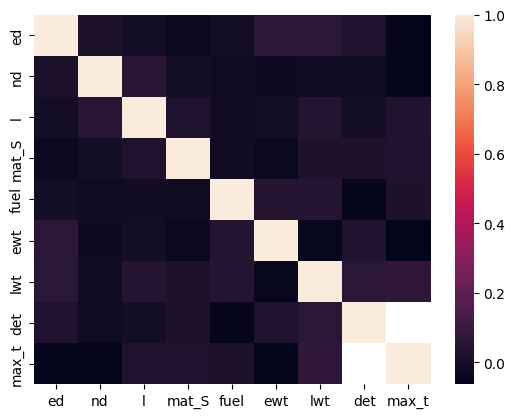

In [16]:
sns.heatmap(tests.corr())

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

In [19]:
print("Coeff >>>",regressor.coef_)
print("Intercept >>>",regressor.intercept_)
print("R-squared score >>>", r2_score(y_test,y_pred))

Coeff >>> [-1.34518162e+00 -2.37114753e+01  3.93397416e-01  1.13185830e-01
  5.15808359e+00 -2.63313910e-02  9.59633221e-03 -1.18066171e+03]
Intercept >>> 1192.359288950981
R-squared score >>> 0.7525602703402223


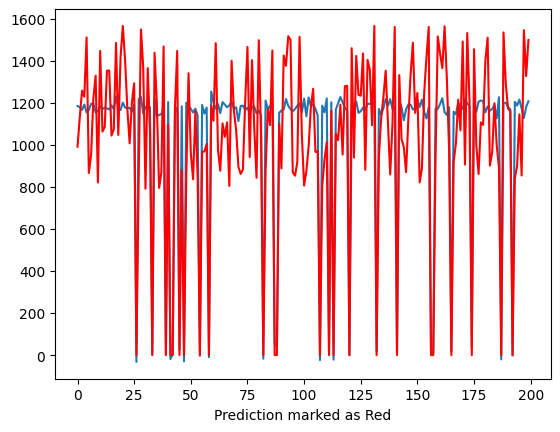

In [20]:
plt.plot(y_pred)
plt.xlabel("Prediction marked as Red")
plt.plot(y_test,c="red")
plt.show()

In [21]:
Xc = tests.iloc[:,:-2].values
yc = tests.iloc[:,7].values

Xc_train,Xc_test,yc_train,yc_test = train_test_split(Xc,yc,test_size=0.2,random_state=0)

In [22]:
classifier = LogisticRegression()
classifier.fit(Xc_train,yc_train)

yc_pred = classifier.predict(Xc_test)

In [23]:
print("Coeff >>>",classifier.coef_)
print("Intercept >>>",classifier.intercept_)
print("Prediction for [8,1,54,489,3,3652,5610] ",classifier.predict([[8,1,54,489,3,3652,5610]]))

Coeff >>> [[ 1.53013286e-02 -2.91090722e-03 -2.99336538e-03 -4.56330136e-03
  -5.31101843e-03 -4.11581799e-05  4.24489019e-05]]
Intercept >>> [-0.00097259]
Prediction for [8,1,54,489,3,3652,5610]  [0]


In [24]:
print("cf-M >>>\n",confusion_matrix(yc_test,yc_pred))

precison, recall, f1 ,s= precision_recall_fscore_support(yc_test,yc_pred,zero_division=0)

print('\n')

print("F1 score >>>",f1[1])
print("Recall >>>",recall[1])
print("Precision >>>",precison[1])

cf-M >>>
 [[176   0]
 [ 24   0]]


F1 score >>> 0.0
Recall >>> 0.0
Precision >>> 0.0


In [25]:
y_pred_proba = classifier.predict_proba(Xc_test)
print("AUC >>>",roc_auc_score(yc_test,y_pred_proba[:,1]))

fpr,tpr,thresholds = roc_curve(yc_test,classifier.predict_proba(Xc_test)[:,1])

AUC >>> 0.43773674242424243


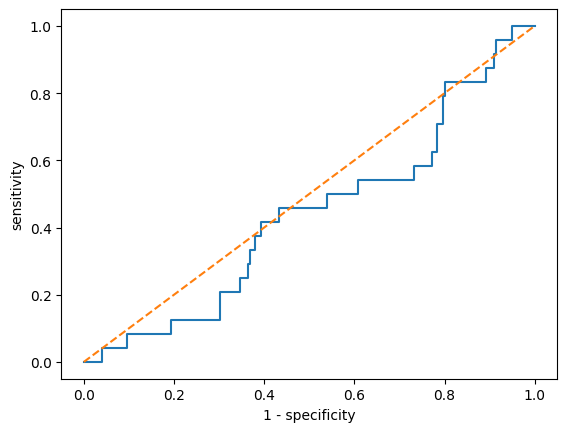

In [26]:
plt.ylabel('sensitivity')
plt.xlabel('1 - specificity')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle = '--')
plt.show()

In [ ]:
with open('./model/classifier.pkl','wb') as cls:
    pickle.dump(classifier,cls)

with open('./model/regressor.pkl','wb') as rgr:
    pickle.dump(regressor,rgr)